# Tiktok Sentimental Analysis

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moade\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Creating neeeded columns for the analysis

In [7]:
datatok = pd.read_csv("tiktok_google_play_reviews.csv")
datatok.head(5)

c:\Users\moade\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [8]:
datatok = datatok[["content", "score"]]
datatok.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


# Checking for NULL values

In [9]:
datatok.isnull().sum()

content    16
score       0
dtype: int64

# So there are sixteen null values in the content column. Let’s drop the null values and move further:

In [10]:
datatok = datatok.dropna()

# Data Cleaning

In [11]:
stopword = set(stopwords.words('english'))


def clean(tok_text):
    tok_text = str(tok_text).lower()
    tok_text = re.sub('\[.*?\]', '', tok_text)
    tok_text = re.sub('https?://\S+|www\.\S+', '', tok_text)
    tok_text = re.sub('<.*?>+', '', tok_text)
    tok_text = re.sub('[%s]' % re.escape(string.punctuation), '', tok_text)
    tok_text = re.sub('\n', '', tok_text)
    tok_text = re.sub('\w*\d\w*', '', tok_text)
    tok_text = [word for word in tok_text.split(' ') if word not in stopword]
    tok_text = " ".join(tok_text)
    tok_text = [stemmer.stem(word) for word in tok_text.split(' ')]
    tok_text = " ".join(tok_text)
    return tok_text


datatok["content"] = datatok["content"].apply(clean)


In [12]:
datatok

,content,score
0,word,5
1,great fun app far,5
2,app would get higher rate liter cant sign seco...,1
3,wish could give percent rate love 💕 😘,5
4,pictur record,5
...,...,...
460282,😍😍,5
460283,nice,1
460284,nice,5
460285,tiktok love sad,5


# Percentage of Rating

In [13]:
ratings = datatok["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(datatok, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

# You can see that 73.6% of the users have given TikTok five stars, and 13.5% of the users have rated it with a one.

# Word Types

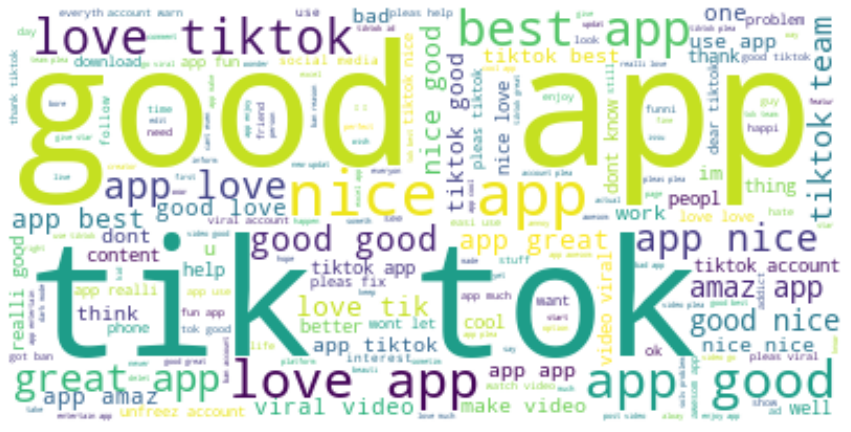

In [14]:
tok_text = " ".join(i for i in datatok.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(tok_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentimental Analysis Part

## Sentiment Scores

In [15]:
datatok["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in datatok["content"]]
datatok["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in datatok["content"]]
datatok["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in datatok["content"]]
datatok = datatok[["content", "Positive", "Negative", "Neutral"]]
datatok.head()

,content,Positive,Negative,Neutral
0,word,0.000,0.00,1.000
1,great fun app far,0.787,0.00,0.213
2,app would get higher rate liter cant sign seco...,0.000,0.07,0.930
3,wish could give percent rate love 💕 😘,0.633,0.00,0.367
4,pictur record,0.000,0.00,1.000


# Words type Positive

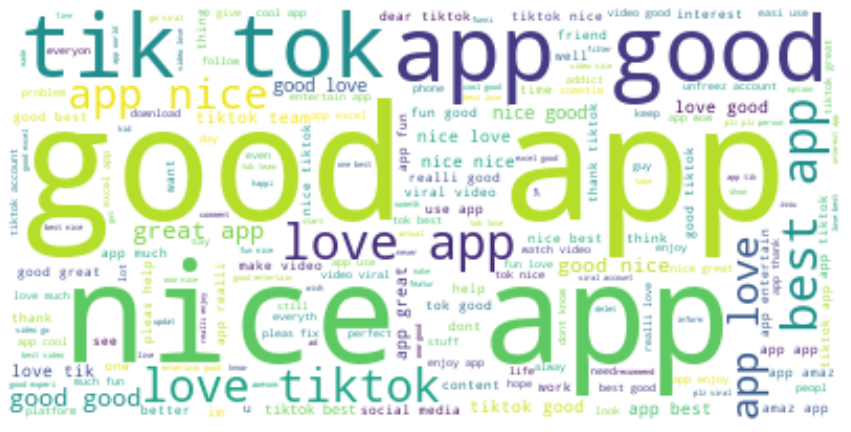

In [16]:
positive =' '.join([i for i in datatok['content'][datatok['Positive'] > datatok["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Words type Negative

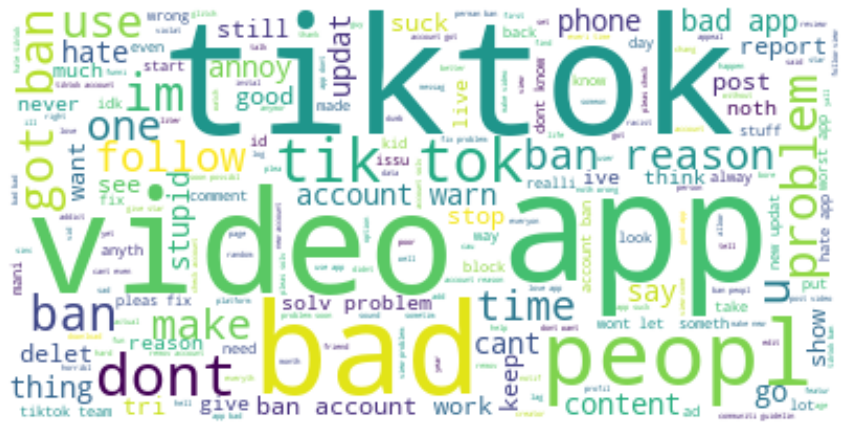

In [17]:
negative =' '.join([i for i in datatok['content'][datatok['Negative'] > datatok["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()